In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('pf_DHODH_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

##### The pf_DHODH data set contains 881 input features and 1 output variable (pIC50 values).

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
547,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
548,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
549,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Output features

In [4]:
Y = df.pIC50
Y


0      4.370590
1      3.845880
2      4.029653
3      3.813892
4      3.698970
         ...   
546    3.602060
547    3.602060
548    3.602060
549    3.602060
550    8.000000
Name: pIC50, Length: 551, dtype: float64

In [5]:
X.shape

(551, 881)

In [6]:
Y.shape

(551,)

#### Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [9]:
X.shape

(551, 158)

#### Data split (80/20 ratio)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.18)

In [80]:
X_train.shape, Y_train.shape

((451, 158), (451,))

In [81]:
X_test.shape, Y_test.shape

((100, 158), (100,))

#### Building a Regression Model using Random Forest

In [91]:
## Calculate R^2 score on the test data
model = RandomForestRegressor(n_estimators=1000, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.40525411857654103

In [78]:
# Calculate R^2 score on the training data
r2_train = model.score(X_train, Y_train)
print("Training R^2 Score:", r2_train)

Training R^2 Score: 0.8063920923207324


In [88]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(close=None, block=None)>

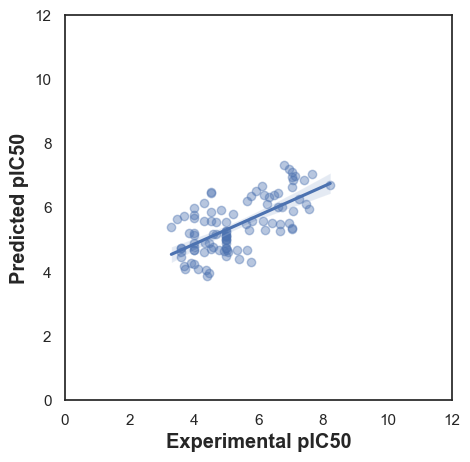

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show